<a href="https://colab.research.google.com/github/FredPeal/fastai-course/blob/main/Lesson1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 4.4 MB/s 
     |████████████████████████████████| 189 kB 44.4 MB/s 
     |████████████████████████████████| 48 kB 4.7 MB/s 
     |████████████████████████████████| 1.2 MB 44.2 MB/s 
     |████████████████████████████████| 55 kB 3.8 MB/s 
     |████████████████████████████████| 51 kB 297 kB/s 
     |████████████████████████████████| 561 kB 39.7 MB/s 
     |████████████████████████████████| 130 kB 47.7 MB/s 
Mounted at /content/gdrive


In [2]:
from fastbook import *

In [15]:
print(URLs.PETS)

https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet.tgz


In [3]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.169731,0.042453,0.012179,01:35


epoch,train_loss,valid_loss,error_rate,time
0,0.056644,0.021455,0.006089,02:11


In [4]:
1+1

2

In [ ]:
img = PILImage.create(image_cat())
img.to_thumb(192)

In [9]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

Is this a cat?: True.
Probability it's a cat: 1.000000


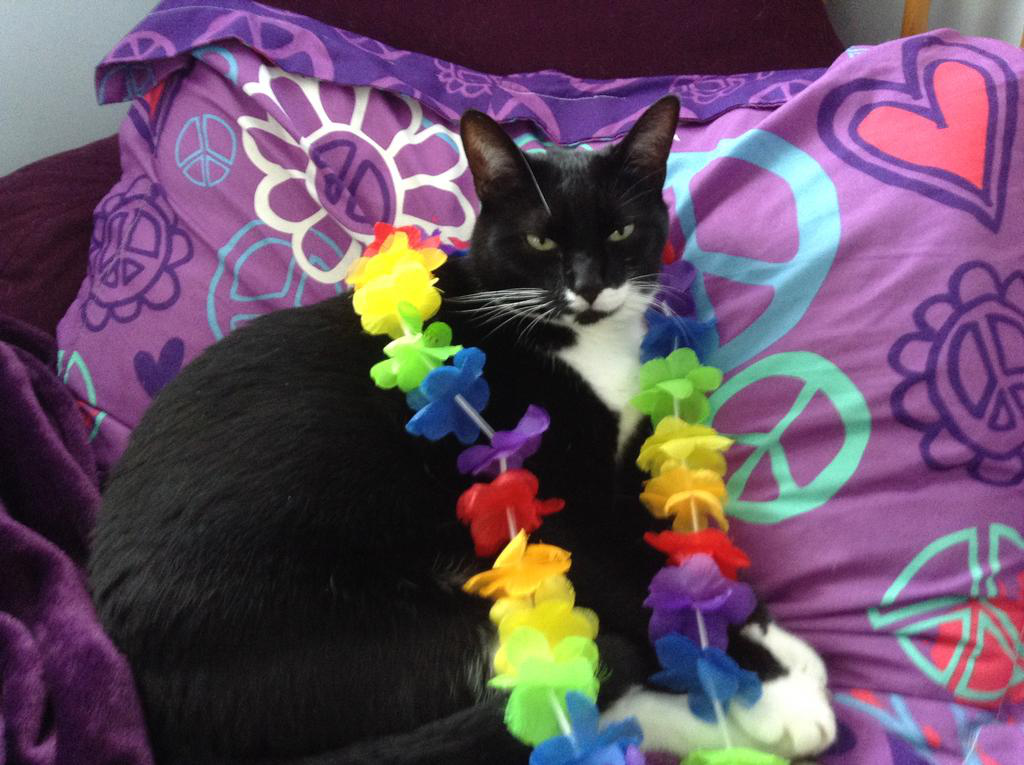

In [14]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")
img